**AIM OF PROJECT: predicting fetal health by CTG analysis results with ML**

For calculating fetal health, we use a device called Cardiotocography (CTG) or electronic fetal monitor, so let's learn about CTG.
About Cardiotocography (CTG) or electronic fetal monitor:-

Cardiotocography (CTG) is a continuous recording of the fetal heart rate obtained via an ultrasound transducer placed on the mother's abdomen.
CTG is widely used in pregnancy as a method of assessing fetal well-being,predominantly in pregnancies with increased risk of complications.
What we find using CTG and when we use CTG:-

A cardiotocography (CTG) test is a medical procedure that monitors a pregnant woman's fetal heartbeat and uterine contractions.
It's often performed during the third trimester, and is used to assess the baby's well-being, identify problems, and monitor the baby's response during labor.
The CTG monitors several different measures, including: Uterine contractions, Baseline heart rate, Variability, Accelerations, and Decelerations.
The CTG is typically recommended for pregnancies with an increased risk of complications. The recommended duration of CTG monitoring is 30 minutes, but the duration can be prolonged if the FHR pattern looks suspicious.
The fetal heart rate (FHR) is classified into: Baseline fetal heart rate, Oscillations, Oscillation amplitude (range), and Long-term oscillations (oscillation rate).
Factors that can affect FHR include: Maternal, Fetoplacental, Fetal, and Exogenous.

**METADATA:**

Baseline value: This feature indicates the FHR (fetal heart rate) per BPM (Beats Per Minute).
Accelerations: Number of accelerations per second.
Fetal movement: Number of fetal movements per second.
Uterine contractions: Number of uterine contractions per second.
Light decelerations: Number of LDs (light decelerations) per second.
Severe decelerations: Number of SDs (severe decelerations) per second.
Prolongued decelerations: Number of PDs (prolonged decelerations) per second.
ASTV: Percentage of time with abnormal short-term variability.
MSTV: Mean value of short-term variability.
ALTV: Percentage of time with abnormal long-term variability.
MLTV: Mean value of long-term variability.
Width: Width of FHR histogram.
Min: Minimum of FHR histogram.
Max: Maximum of FHR histogram.
Nmax: Number of histogram peaks.
Nzeros: Number of histogram zeroes.
Mode: Histogram mode.
Medianc: Histogram median.
Variance: Histogram variance.
Tendency: Histogram Tendency.
Target: Fetal_Health :- Fetal state class code (N=Normal, S=Suspected, P=Pathological)


**EXPLORATORY DATA ANALYSIS**

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp  
plt.style.use('seaborn-v0_8-whitegrid')

In [94]:
#Let's start by reading the dataset

import numpy as np
import pandas as pd

df = pd.read_csv("../Data/Raw/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [95]:
df.shape

(2126, 22)

In [96]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [97]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [98]:
df.isna().sum()
#no null found

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [99]:
df.duplicated().sum()

#very few duplicated values: can be dropped

np.int64(13)

In [100]:
#drop duplicated values:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [101]:
df.shape

(2113, 22)

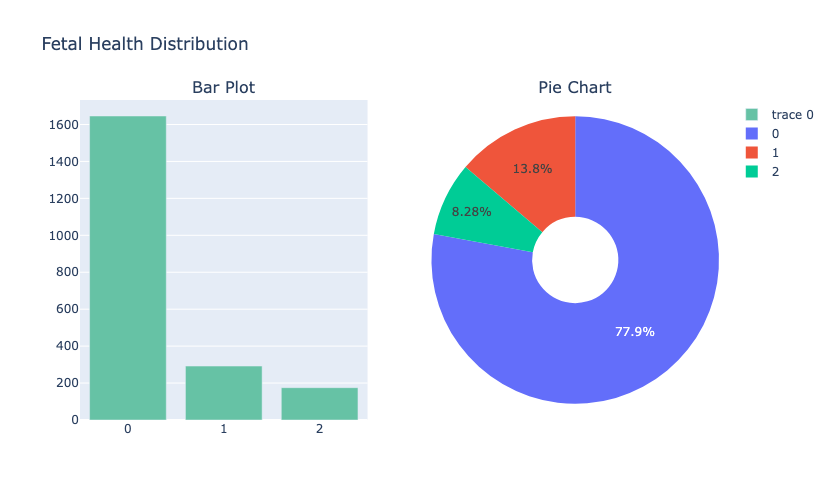

In [102]:
bar_fig = go.Bar(
    x=(df['fetal_health']-1).value_counts().index,
    y=(df['fetal_health']-1).value_counts().values,
    marker=dict(color='#66C2A5')
)

# Pie chart for fetal_health value counts
pie_fig = go.Pie(
    labels=(df['fetal_health']-1).value_counts().index,
    values=(df['fetal_health']-1).value_counts().values,
    hole=0.3  # Optional: for a donut-style pie chart
)

# Create subplots with Plotly
fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Bar Plot", "Pie Chart"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Add the bar plot to the first subplot
fig.add_trace(bar_fig, row=1, col=1)

# Add the pie chart to the second subplot
fig.add_trace(pie_fig, row=1, col=2)

# Update layout for better visualization
fig.update_layout(
    title_text="Fetal Health Distribution",
    showlegend=True,  # Hide legend to avoid redundancy in pie chart
    height=500,
    width=700
)

# Show the figure
fig.show()

In [103]:
# rename to make easy to understand visualiztion
#df['fetal_health'] = df['fetal_health'].replace({1:'Normal',2:'suspect' ,3:'pathological'})

In [104]:
df['fetal_health'].value_counts()
#these values are imbalanced: keep in mind for ML model

fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64

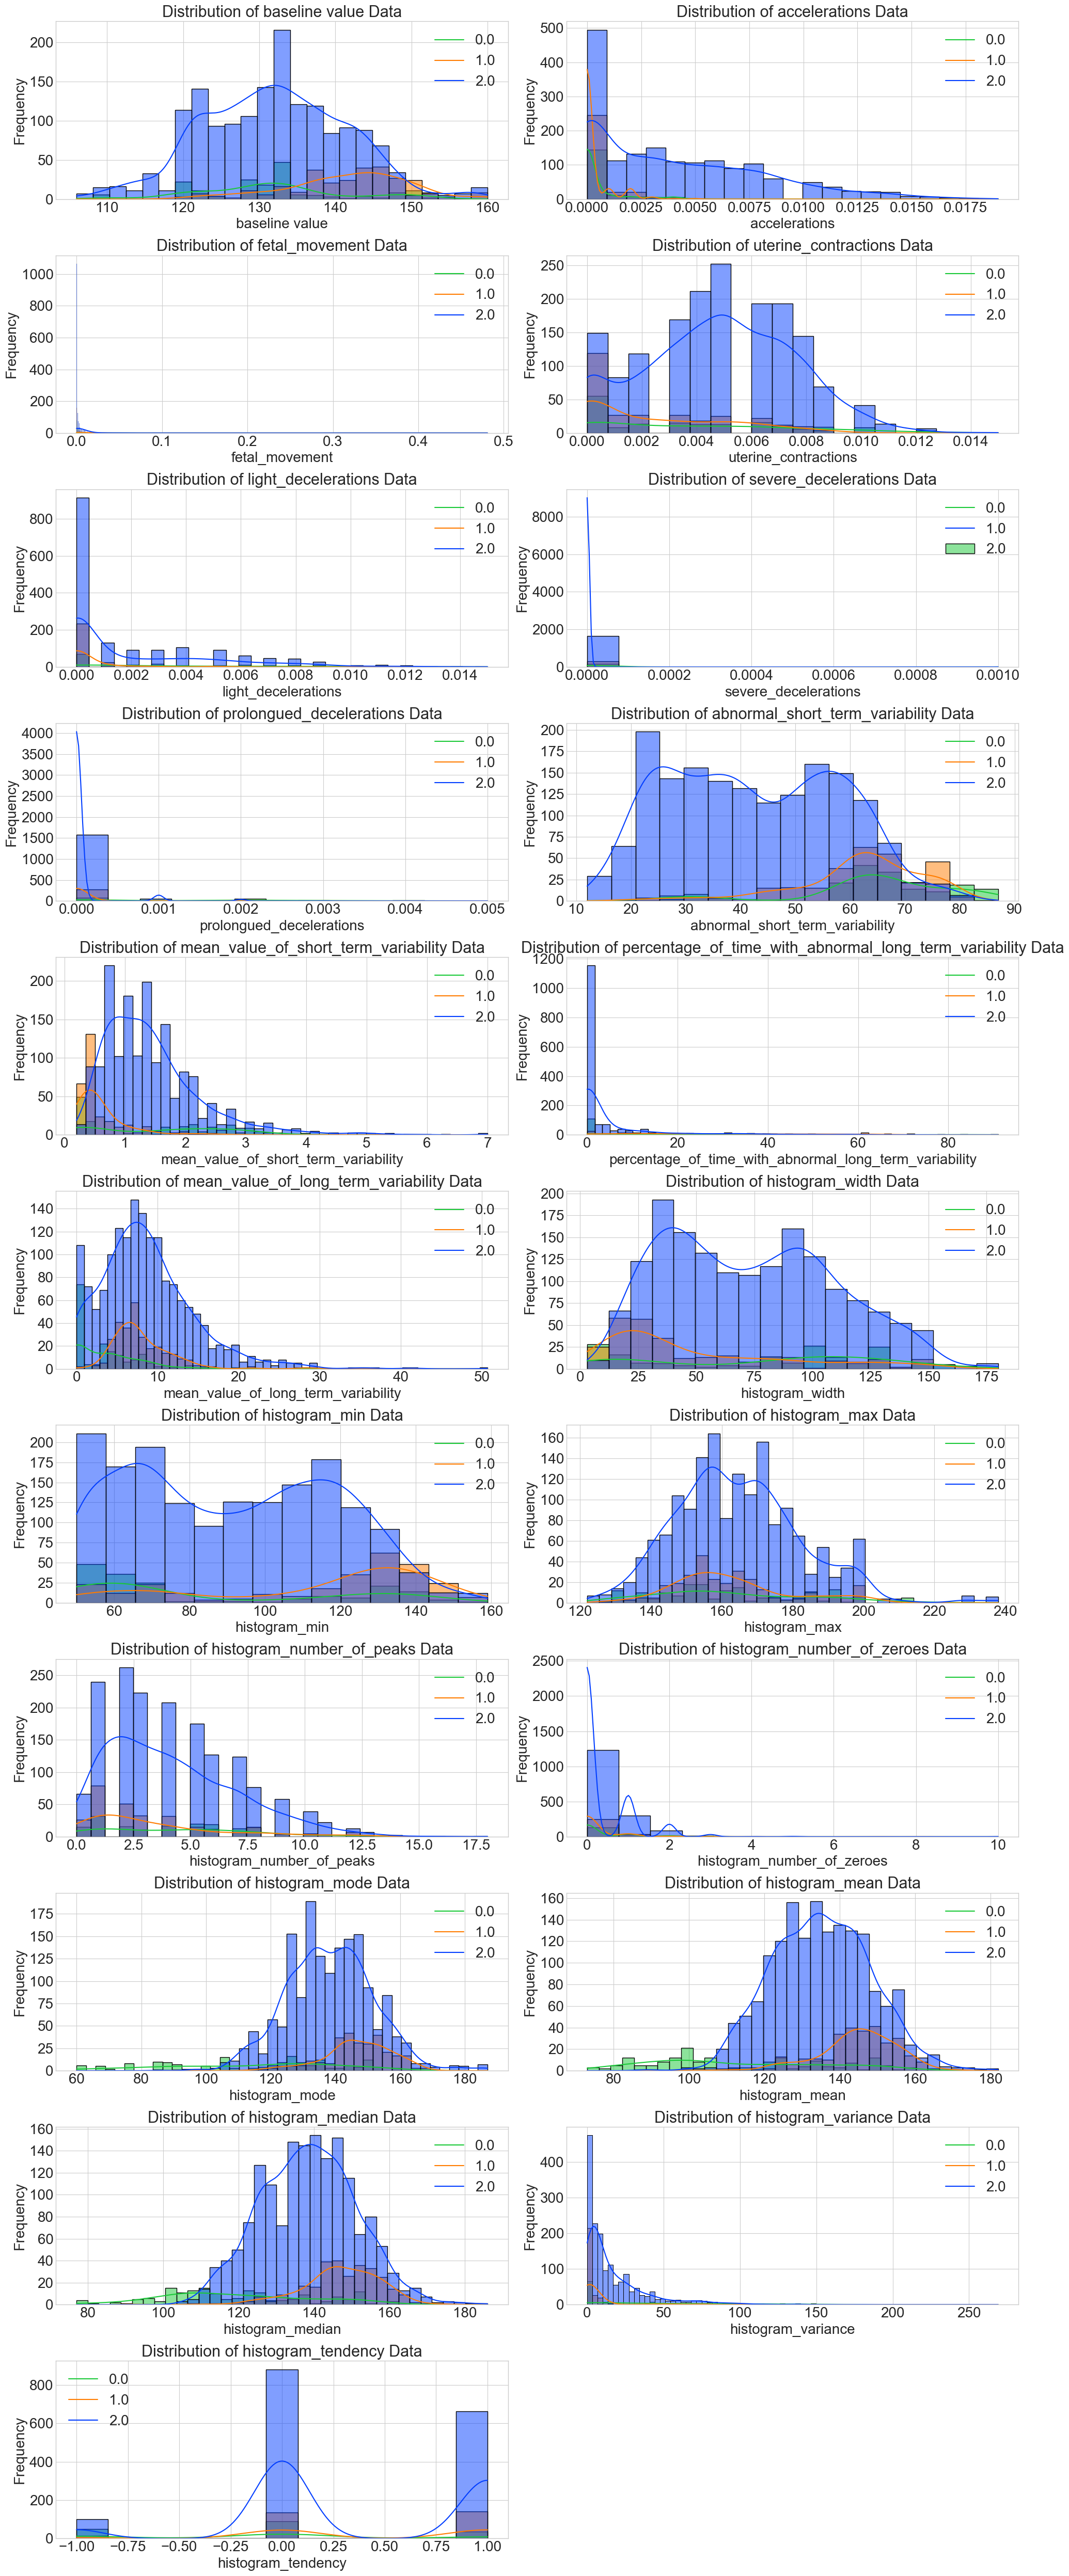

In [105]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.subplot(11, 2, num_row)
    
    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)  
    
    # Plot histogram with KDE and hue
    sns.histplot(x=df[col], kde=True, hue=df['fetal_health'], palette='bright')
    
    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    
    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Set larger font size for the legend
    plt.legend(df['fetal_health'].value_counts().index-1,title_fontsize='20', fontsize='20')
    #plt.legend(title='fetal_health',title_fontsize='15', fontsize='15')
    # Adjust layout
    plt.tight_layout()
    
    num_row += 1

# Show the plots

plt.show()